In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', delimiter = ',')

Mounted at /content/drive


In [2]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(dataset)
X_scaled_array = scaler.transform(dataset)
X_scaled = pd.DataFrame(X_scaled_array, columns = dataset.columns)

In [4]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) 
X_pca.head(10)

,PC1,PC2
0,-0.051739,2.624022
1,-0.817441,-0.730375
2,-2.057599,-0.039098
3,-1.903043,-0.596701
4,-0.768371,0.412545
5,-1.000640,-0.233692
6,-0.591350,1.637950
7,-2.001955,-1.329644
8,-1.236123,1.068056
9,-1.690869,0.018412


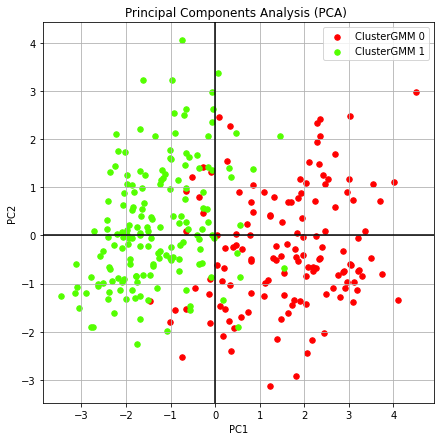

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

y = dataset['target']

def plotData(df, groupby):   
    fig, ax = plt.subplots(figsize = (7,7))
    # color map
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(2-1)), 
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) ");

df_plot = X_pca.copy()

df_plot['ClusterGMM'] = y
plotData(df_plot, 'ClusterGMM')

Number of clusters: 2
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0]
Weights: [0.4958854 0.5041146]
Means: [[0.52927901 0.68440066 0.32790862 0.3555542  0.27527272 0.14587449
  0.2526639  0.60270118 0.31076302 0.16447835 0.70082967 0.18147204
  0.77116776]
 [0.52766496 0.68195609 0.31684688 0.35433812 0.27388947 0.15111212
  0.27520342 0.59805256 0.34244164 0.17082553 0.69852919 0.18320021
  0.77118633]]
Type of covariance_GMM:

(0.96, 0.2696629213483146)

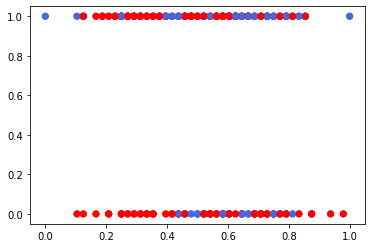

In [6]:
#without PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

scale = MinMaxScaler()
X = dataset.drop('target',axis=1)
y = dataset['target']
x = scale.fit_transform(X)

colors = ['royalblue','red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

GM_n_classes = 2

gmm = GaussianMixture(n_components=GM_n_classes, covariance_type='tied',max_iter=100,init_params='random',random_state = 35)
GMcluster_fit = gmm.fit(x)
GMlabels = GMcluster_fit.predict(x)

print('Number of clusters: ' + format(len(np.unique(GMlabels))))

# predict the cluster for each data point
y = gmm.predict(x)
print(y)

weights_GMM = gmm.weights_
print("Weights:",weights_GMM)

means_GMM = gmm.means_
print("Means:",means_GMM)

covariance_GMM = gmm.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))

covariance_GMM.size

plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=65)

grd1 = GridSearchCV(estimator = SVC(kernel='linear'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=3,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

best_parameters = grid1.best_params_
print("The best paramters are for Linear Kernel: \n",best_parameters)

best_model1 = SVC(kernel='linear', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model1, x_train, y_train, cv=3, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm =best_model1.predict(x_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

In [7]:
grd2 = GridSearchCV(estimator = SVC(kernel='rbf'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=3,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid2 = grd2.fit(x,y)

best_parameters = grid2.best_params_
print("The best paramters are for RBF Kernel: \n",best_parameters)

best_model2 = SVC(kernel='rbf', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model2, x_train, y_train, cv=3, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm2 =best_model2.predict(x_test)

cm_svm2 = confusion_matrix(y_test, y_pred_svm2)
print(cm_svm2)

recall_svm2 = cm_svm2[0][0]/(cm_svm2[0][0] + cm_svm2[0][1])
precision_svm2 = cm_svm2[0][0]/(cm_svm2[0][0]+cm_svm2[1][1])
recall_svm2,precision_svm2

The best paramters are for RBF Kernel: 
 {'C': 10, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.9388329979879275
[[23  2]
 [ 1 65]]


(0.92, 0.26136363636363635)

In [8]:
grd3 = GridSearchCV(estimator = SVC(kernel='poly'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=3,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid3 = grd3.fit(x,y)

best_parameters = grid2.best_params_
print("The best paramters are for Polynomial Kernel: \n",best_parameters)


best_model3 = SVC(kernel='poly', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model3, x_train, y_train, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm3 =best_model3.predict(x_test)

cm_svm3 = confusion_matrix(y_test, y_pred_svm2)
print(cm_svm3)

svm_result3 = accuracy_score(y_test,y_pred_svm3)

recall_svm3 = cm_svm3[0][0]/(cm_svm3[0][0] + cm_svm3[0][1])
precision_svm3 = cm_svm3[0][0]/(cm_svm3[0][0]+cm_svm3[1][1])
recall_svm3,precision_svm3

The best paramters are for Polynomial Kernel: 
 {'C': 10, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.9575757575757576
[[23  2]
 [ 1 65]]


(0.92, 0.26136363636363635)

In [9]:
#From Scratch

import pandas as pd
import numpy as np
import math
import sys

class emClustering():
    def __init__(self,n):
        self.n = n

    def inputData(self,dataset_name): 
        train_data = dataset.values
        train_X = train_data[:,0:4]
        return train_X.astype(float),train_data[:,4]

    def initializeCluster(self,dataset,noOfClusters):
        szData = len(dataset[:,0])
        szCluster = math.ceil(szData/noOfClusters)
        clusterAssign = np.zeros(szData)
        for i in range(szData):
            startId = (i-1)*szCluster
            endId = min(startId + szCluster + 1,szData)
            clusterAssign[startId:endId] = i
        return clusterAssign.astype(int)

    def emInitialization(self,dataset,clusterAssign):
        if len(dataset[:,0]) == len(clusterAssign):
            clusterId = np.unique(clusterAssign)
            meanMatrix = np.zeros((len(clusterId),len(dataset[0,:])))
            varMatrix = []
            pOfCi = np.zeros(len(clusterId))
            pOfCi[:] = 1/len(clusterId)
            for i in clusterId:
                dataPts = np.where(clusterAssign == i)
                meanMatrix[i-1,:] = np.mean(dataset[dataPts,:],axis=1)
                #varMatrix.append(np.cov(np.transpose(dataset[dataPts])))
                ## Neglecting cross dimensional dependency, calc only diagonal terms
                ##
                weight = np.ones(len(dataPts[0]))
                axisIn = 0
                thisClusterData = dataset[dataPts,:]
                varMatrix.append(self.calcDiagCovMat(thisClusterData[0],weight))
        return meanMatrix,varMatrix,pOfCi


    def calcDiagCovMat(self,dataset,weight):
        #thisVarLine = np.var(dataset,axis=1)
        ## Creating fx for weighted variance
        #print("dataset: " + str(len(dataset[:,0])) + " x " + str(len(dataset[0,:])))
        thisVarLine = np.average((dataset-np.average(dataset,axis = 0))**2,axis = 0,weights = weight)
        sz = len(thisVarLine)
        varianceMatrix = np.zeros((sz,sz))
        for i in range(sz):
            varianceMatrix[i,i] = thisVarLine[i]
        return varianceMatrix

    def calcNormalProbabilityDensity(self,x,mean,coVarMat):
        d = len(coVarMat[0,:])  # dimensions of data
        det_coVar = np.linalg.det(coVarMat)
        x_mu = x-mean
        invCoVar = np.linalg.inv(coVarMat)
        denominator = math.pow(2*np.pi,d/2)*math.pow(det_coVar,0.5)

        exponentTerm =  math.exp(-0.5*np.matmul(np.matmul(np.transpose(x_mu),invCoVar),x_mu))
        probDensity = exponentTerm/denominator
        return probDensity

    def emExpectation(self,dataset,clusterAssign,mean,coVarMat,pOfCi):
        '''
         @topic: Calculates the Wi for each clusters: Posterior probability P(Ci/xj) using eq 13.9 Pg 382 zaki = P(Ci). P(xi/Ci)/P(xi)
         @Parameters:
            1. dataset = full dataset
            2. clusterAssign = n x 1 array indicating the assignment of each of n point in p clusters
            3. mean = mean of the distribution
            4. coVarMat =  Covariance Matrix of the distribution
            5. pOfCi = Probability of Cluster Ci for given data
        '''
        Wij = np.zeros((len(dataset[:,0]),len(np.unique(clusterAssign))))
        for i in range(len(Wij[:,0])): # run for each point

            # Calculate sigma[(f(x).P(Ca))] suming the term for each cluster for this point
            pXnormalProb = np.zeros(len(Wij[0,:]))
            for j in range(len(Wij[0,:])):
                pXnormalProb[j] = pOfCi[j]*self.calcNormalProbabilityDensity(dataset[i,:],mean[j,:],coVarMat[j])
            denominator = sum(pXnormalProb)
            Wij[i] = pXnormalProb*(1/denominator)
        return Wij


    def emMaximization(self,dataset,Wij,mean,coVar,pOfCi):
        noOfClusters = len(mean[:,0])
        newMean = np.zeros((len(mean[:,0]),len(mean[0,:])))
        newCoVar = []
        newPOfCi = np.zeros(len(pOfCi))
        for i in range(noOfClusters):
            newMean[i,:] = np.average(dataset,axis = 0, weights = Wij[:,i])
            newCoVar.append(self.calcDiagCovMat(dataset,Wij[:,i]))
        newPOfCi = np.average(Wij,axis=0)

        return newMean,newCoVar,newPOfCi

    def findEuclideanDist(self,newVect,oldVect):    
        if len(newVect) == len(oldVect):
            diff = newVect-oldVect
            dist = 0
            for i in range(len(diff)):
                dist = dist + diff[i]**2
            eucDist = math.sqrt(dist)
        else:
            print("Size Mis-match between input vectors in calculating Euclidean Distance")
            eucDist = None
        return eucDist

    def normSortedMean(self,thisMatrix):
        #normVal = np.zeros(len(thisMatrix[0,:]))
        normVal = np.linalg.norm(thisMatrix,axis = 1)
        sortId = np.argsort(normVal)
        return sortId

    def calcPurity(self,predicted,actual):
        sz = len(actual)
        if sz == len(predicted):
            # Get the unique list of clusters 
            predictedList = np.unique(predicted)
            actualList = np.unique(actual)
            purity = 0
            thisIntersect = np.zeros(len(actualList))
            for i in range(len(predictedList)):
                # Find points for each of the clusters in the predicted list
                subActual = actual[predicted == predictedList[i]]
                for j in range(len(actualList)):
                    # Find number of points that match the actual cluster name
                    thisIntersect[j] = len(subActual[subActual == actualList[j]])
                purity = purity + max(thisIntersect)
            purity = purity/sz
        else:
            print("Size Mis-match between actual and predicted value in calcPurity")
            purity = None
        return purity

data=pd.DataFrame(dataset['restecg'],dataset['fbs'],dataset['chol'],dataset['age'])

if __name__ == '__main__':
    n = 2  # No of clusters
    dataset_name = data

    # Class Instantiation
    em = emClustering(n)

    # import the data from the file
    [trainData,trueClassification] = em.inputData(dataset_name)

    # Initialize the cluster
    clusterAssign = em.initializeCluster(trainData,n)

    # Calculate the mean for each cluster
    [clusterWiseMean,clusterWiseVar,pOfCi] = em.emInitialization(trainData,clusterAssign)

    #print(clusterWiseMean)
    #print(clusterWiseVar)
    #print(pOfCi)

    # Initialize EM Iteration until error is epsilon < 0.00001
    epsilon = 1
    mean = clusterWiseMean
    coVar = clusterWiseVar
    pOfCi = pOfCi
    counter = 0
    while epsilon > 0.00001:
        counter = counter + 1
        '''
        ## Expectation Step (Calculating posterier probability of cluster Ci given point xj)
        #Wi matrix i.e. P(Ci)
        '''
        Wij = em.emExpectation(trainData,clusterAssign,clusterWiseMean,clusterWiseVar,pOfCi)
        #print(Wij)


        '''
        ## Maximization Step
        Assuming that all the posterior probability values or weights
        #wij = P(Ci|xj) are known, the maximization step, computes re-estimating μi, sigma2 and P(Ci).
        '''
        [newMean,newCoVar,newPOfCi] = em.emMaximization(trainData,Wij,mean,coVar,pOfCi)
        #print("\n")
        #print(newMean)
        #print(newPOfCi)


        # Find sum of Euclidian distance between old and new mean
        epsilon = 0
        for i in range(n):
            epsilon = epsilon + em.findEuclideanDist(newMean[i,:],mean[i,:])
        #print("Old Mean: " + str(mean))
        #print("New Mean: " + str(newMean))

        #print("Iteration No: " + str(counter) + ". Current convergence error: " + str(dist))

        mean = newMean
        coVar = newCoVar
        pOfCi = newPOfCi

    # Output printing for submit to canvas

    # a: The final mean for each cluster
    sortId = em.normSortedMean(mean)
    sortedMean = mean[sortId,:]
    print("Mean:")
    for i in mean:
        print(i,end=",")
    print("\n")
    #print(np.reshape(sortedMean,len(sortedMean[0,:])*len(sortedMean[:,0])))

    '''
    # b: The final covariance matrix for each cluster
    print("Covariance Matrices: ")
    for i in range(len(sortId)):
        print(coVar[i])
        print("\n")
    
    # c: Iteration count required to converge
    print("Iteration Count=" + str(counter))
    print("\n")
    #print(Wij)
    #print(np.argmax(Wij,axis = 1))
    '''
    
    # D: Print Cluster Membership
    print("Cluster Membership:")
    clusterAssign = np.argmax(Wij,axis = 1)
    sz = np.zeros(n)
    ix = 0
    for i in sortId:
        pointId = (clusterAssign==i)
        clusterPt = trainData[pointId]
        sz[ix] = int(len(clusterPt))
        for j in trainData[pointId]:
            print(j, end=",")
        ix = ix+1
        print("\n")

    # E: Final size of each cluster.
    print("Size",end=":")
    for i in sz:
        print(int(i),end=" ")
    print("\n")


    # Calculate Purity to check the correctness of the classification 
    trueClusterNames = np.unique(trueClassification)
    trueClusterSize = len(trueClusterNames)
    trueClusterAssign = np.zeros(len(trueClassification))
    j = 0
    for i in trueClusterNames:
        trueClusterAssign[trueClassification == i] = j
        j = j+1

    purityVal = em.calcPurity(clusterAssign,trueClusterAssign)
    print("Purity:" + str(purityVal))

Mean:
[ 52.7772762    0.5410256    1.35750096 129.15590363],[ 56.04828246   0.8336197    0.55366628 134.23587493],

Cluster Membership:
[ 63.   1.   3. 145.],[ 37.   1.   2. 130.],[ 41.   0.   1. 130.],[ 57.   0.   0. 120.],[ 56.   0.   1. 140.],[ 44.   1.   1. 120.],[ 48.   0.   2. 130.],[ 64.   1.   3. 110.],[ 58.   0.   3. 150.],[ 50.   0.   2. 120.],[ 58.   0.   2. 120.],[ 66.   0.   3. 150.],[ 69.   0.   3. 140.],[ 44.   1.   2. 130.],[ 40.   1.   3. 140.],[ 71.   0.   1. 160.],[ 51.   1.   2. 110.],[ 65.   0.   2. 140.],[ 53.   1.   2. 130.],[ 41.   0.   1. 105.],[ 44.   1.   1. 130.],[ 54.   1.   2. 125.],[ 51.   1.   3. 125.],[ 46.   0.   2. 142.],[ 54.   0.   2. 135.],[ 54.   1.   2. 150.],[ 65.   0.   2. 155.],[ 65.   0.   2. 160.],[ 51.   0.   2. 140.],[ 53.   0.   0. 130.],[ 39.   1.   2. 140.],[ 44.   1.   2. 140.],[ 47.   1.   2. 138.],[ 53.   0.   2. 128.],[ 53.   0.   0. 138.],[ 51.   0.   2. 130.],[ 62.   1.   2. 130.],[ 44.   0.   2. 108.],[ 63.   0.   2. 135.],[ 34. 

Weights: [0.47193096 0.52806904]
Means: [[140.5376936    0.47551513 250.13297974   0.        ]
 [157.78765612   0.5750053  242.80637456   1.83119371]]
Type of covariance_GMM: <class 'numpy.ndarray'>
[1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1]
The best paramters are for Linear Kernel: 
 {'C': 0.1, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.9372937293729372
[[51  0]
 [ 0 40]]


(1.0, 0.5604395604395604)

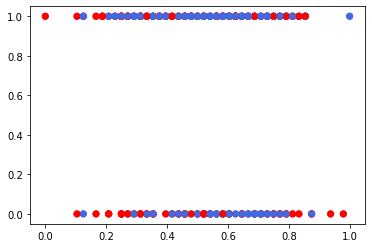

In [10]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

seed=0
#X = dataset.drop(['target'], axis=1)
X1 = dataset[['thalach','restecg','chol','cp']]

GMM = GaussianMixture(n_components = 2, random_state=seed)
res_GMM = GMM.fit(X1)

weights_GMM = GMM.weights_
print("Weights:",weights_GMM)

means_GMM = GMM.means_
print("Means:",means_GMM)

covariance_GMM = GMM.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))

covariance_GMM.size

y = res_GMM.predict(X1)
print(y)

plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=65)

grd1 = GridSearchCV(estimator = SVC(kernel='linear'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=3,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

best_parameters = grid1.best_params_
print("The best paramters are for Linear Kernel: \n",best_parameters)

best_model1 = SVC(kernel='linear', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model1, x, y, cv=3, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm =best_model1.predict(x_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

'restecg','fbs'


FINAL RESULT:
	Cluster 1
		Number Points in Cluster 258
		Centroid: [0.54651163 0.        ]
		Probability: 85.148515%
	Cluster 2
		Number Points in Cluster 45
		Centroid: [0.42222222 1.        ]
		Probability: 14.851485%


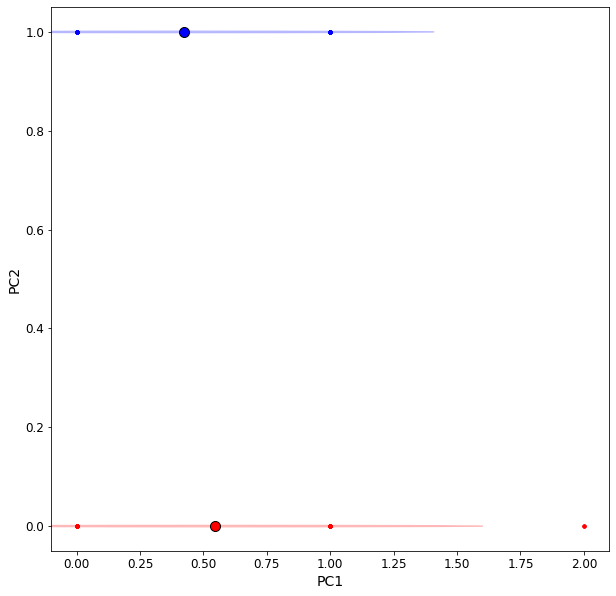

'restecg','chol'


FINAL RESULT:
	Cluster 1
		Number Points in Cluster 247
		Centroid: [  0.50782211 230.79199644]
		Probability: 65.091942%
	Cluster 2
		Number Points in Cluster 56
		Centroid: [  0.56577633 275.1142266 ]
		Probability: 34.908058%


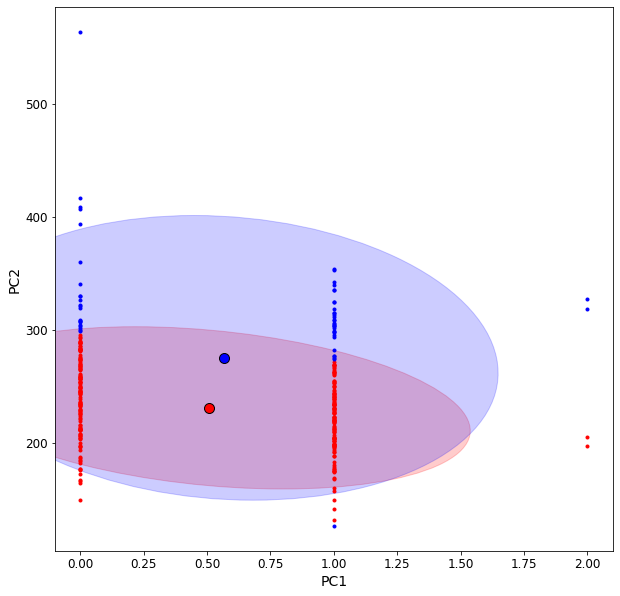

'restecg','age'


FINAL RESULT:
	Cluster 1
		Number Points in Cluster 202
		Centroid: [ 0.47249653 59.63500523]
		Probability: 63.209311%
	Cluster 2
		Number Points in Cluster 101
		Centroid: [ 0.62350289 45.31434752]
		Probability: 36.790689%


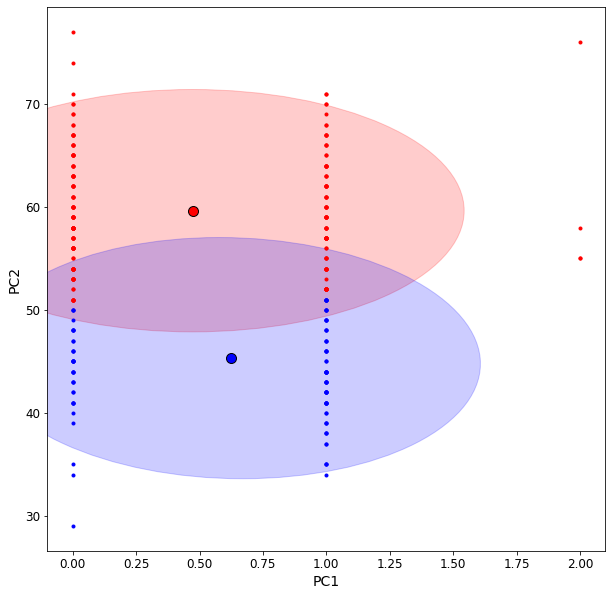

'chol','age'


FINAL RESULT:
	Cluster 1
		Number Points in Cluster 233
		Centroid: [229.15894011  53.50458963]
		Probability: 62.585373%
	Cluster 2
		Number Points in Cluster 70
		Centroid: [274.87658529  55.80782523]
		Probability: 37.414627%


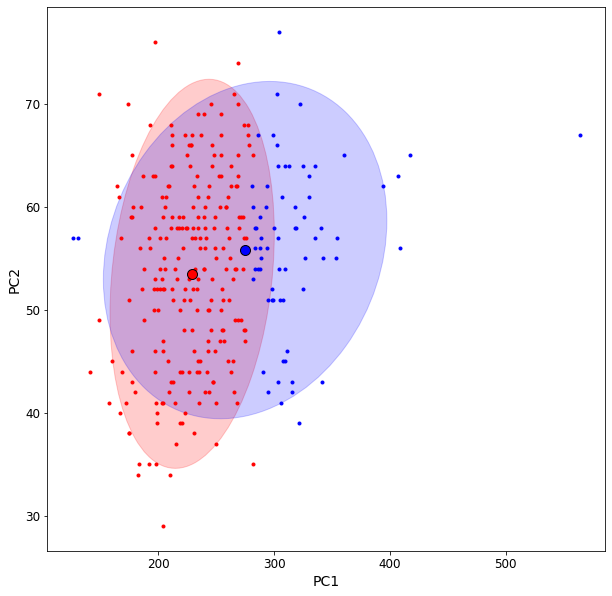

'chol','fbs'


FINAL RESULT:
	Cluster 1
		Number Points in Cluster 258
		Centroid: [245.97674419   0.        ]
		Probability: 85.148515%
	Cluster 2
		Number Points in Cluster 45
		Centroid: [247.91111111   1.        ]
		Probability: 14.851485%


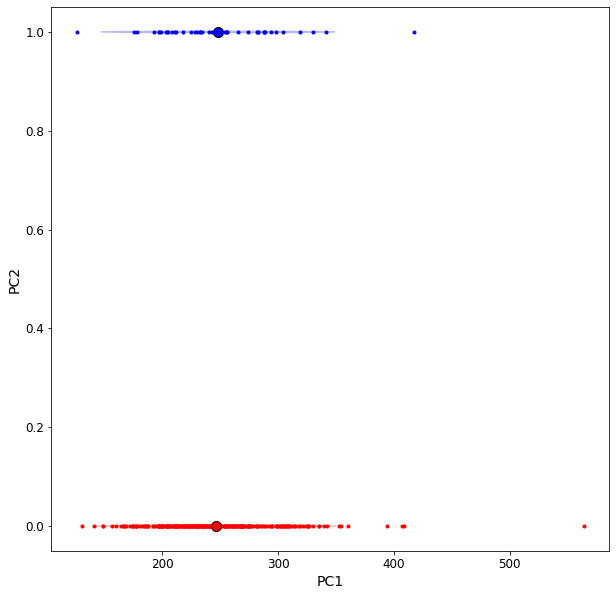

'fbs','age'


FINAL RESULT:
	Cluster 1
		Number Points in Cluster 45
		Centroid: [ 1. 57.]
		Probability: 14.851485%
	Cluster 2
		Number Points in Cluster 258
		Centroid: [ 0.         53.90697674]
		Probability: 85.148515%


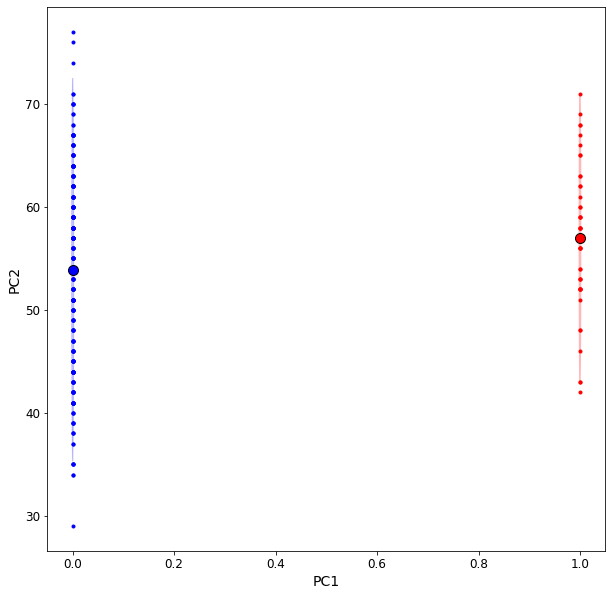

In [11]:
#using random 2 features without pca

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM1

NUM_CLUSTERS = 2
MAX_ITERATIONS = 10
COLORS = ['red', 'blue']

def print_results(means_clusters, probability_clusters, label_cluster_points):
    print('\n\nFINAL RESULT:')
    for i, c in enumerate(means_clusters):
        print('\tCluster %d' % (i + 1))
        print('\t\tNumber Points in Cluster %d' % label_cluster_points.count(i))
        print('\t\tCentroid: %s' % str(means_clusters[i]))
        print('\t\tProbability: %02f%%' % (probability_clusters[i] * 100))


def plot_ellipse(center, covariance, alpha, color):
    # eigenvalues and eigenvector of matrix covariance
    eigenvalues, eigenvector = np.linalg.eigh(covariance)
    order = eigenvalues.argsort()[::-1]
    eigenvector = eigenvector[:, order]

    # Calculate Angle of ellipse
    angle = np.degrees(np.arctan2(*eigenvector[:, 0][::-1]))

    # Calculate with, height
    width, height = 4 * np.sqrt(eigenvalues[order])

    # Ellipse Object
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                      alpha=alpha, color=color)

    ax = plt.gca()
    ax.add_artist(ellipse)

    return ellipse


def plot_results(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters):
    plt.figure(figsize=(10,10))
    plt.plot()
    for nc in range(len(means_clusters)):
        # Plot points in cluster
        points_cluster = list()
        for i, p in enumerate(label_cluster_points):
            if p == nc:
                plt.plot(points[i][0], points[i][1], linestyle='None',
                         color=COLORS[nc], marker='.')
                points_cluster.append(points[i])
        # Plot mean
        mean = means_clusters[nc]
        plt.plot(mean[0], mean[1], 'o', markerfacecolor=COLORS[nc],
                 markeredgecolor='k', markersize=10)

        # Plot Ellipse
        plot_ellipse(mean, covars_matrix_clusters[nc], 0.2, COLORS[nc])
        plt.xlabel('PC1', fontsize=14)
        plt.ylabel('PC2', fontsize=14)
        plt.xticks(size = 12)
        plt.yticks(size = 12)
    plt.savefig('EM-Clustering.eps')
    plt.show()
    #files.download('EM-Clustering.eps')

def expectation_maximization(dataset, num_clusters, max_iterations):
    # Read data set
    points = dataset.values

    # Object GMM
    gmm = GMM1(n_components=num_clusters, covariance_type='full',n_init=max_iterations)

    # Estimate Model (params='wmc'). Calculate, w=weights, m=mean, c=covars
    gmm.fit(points)

    # Predict Cluster of each point
    label_cluster_points = gmm.predict(points)

    means_clusters = gmm.means_
    probability_clusters = gmm.weights_
    covars_matrix_clusters = gmm.covariances_

    # Print final result
    print_results(means_clusters, probability_clusters,
                  label_cluster_points.tolist())

    # Plot Final results
    plot_results(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters)

DATASET1 = dataset[['restecg','fbs']]
DATASET2 = dataset[['restecg','chol']]
DATASET3 = dataset[['restecg','age']]
DATASET4 = dataset[['chol','age']]
DATASET5 = dataset[['chol','fbs']]
DATASET6 = dataset[['fbs','age']] 

if __name__ == '__main__':
    print("'restecg','fbs'")
    expectation_maximization(DATASET1, NUM_CLUSTERS,MAX_ITERATIONS)
    print("'restecg','chol'")
    expectation_maximization(DATASET2, NUM_CLUSTERS,MAX_ITERATIONS)
    print("'restecg','age'")
    expectation_maximization(DATASET3, NUM_CLUSTERS,MAX_ITERATIONS)
    print("'chol','age'")
    expectation_maximization(DATASET4, NUM_CLUSTERS,MAX_ITERATIONS)
    print("'chol','fbs'")
    expectation_maximization(DATASET5, NUM_CLUSTERS,MAX_ITERATIONS)
    print("'fbs','age'")
    expectation_maximization(DATASET6, NUM_CLUSTERS,MAX_ITERATIONS)

#Model

In [12]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler()

#final_dataset = dataset[['restecg','fbs','chol','age']]
final_dataset = dataset[['chol','restecg','thalach','cp']]
scaler.fit(final_dataset)
final_X_scaled_array = scaler.transform(final_dataset)
final_X_scaled = pd.DataFrame(final_X_scaled_array, columns = final_dataset.columns)

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(final_X_scaled)
final_X_pca_array = pca.transform(final_X_scaled)
final_X_pca = pd.DataFrame(final_X_pca_array, columns=['PC1','PC2'])
final_X_pca.head(10)

,PC1,PC2
0,1.073936,0.967025
1,1.923842,0.315303
2,0.572025,0.463003
3,1.125579,-0.242502
4,-0.609781,0.749030
5,-0.068420,-1.501322
6,-0.472713,1.286774
7,0.831211,0.015550
8,1.542334,-0.709492
9,2.050681,-0.908124


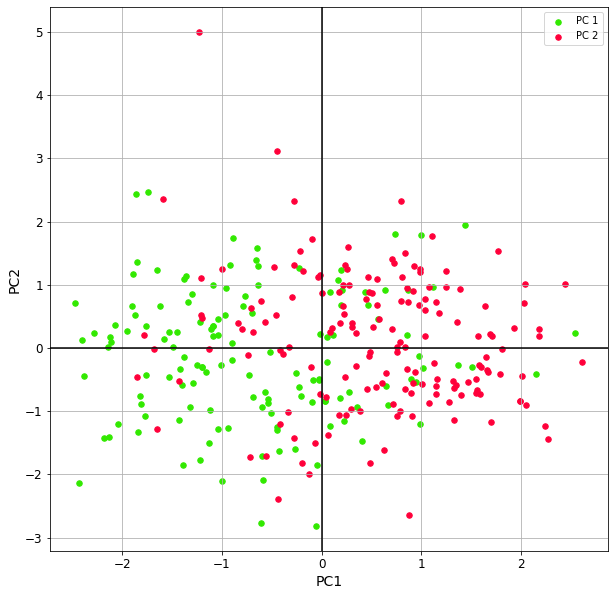

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files

y = dataset['target']

def plotData(df, groupby):
    #plt.figure(figsize=(15,7), facecolor='w')
    fig, ax = plt.subplots(figsize=(10,10), facecolor='w')
    # color map
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        i=i+1
        cluster.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', color = cmap(i/(4-1)), label = "%s %i" % (groupby, i), s=30) # dot size  
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.tick_params(axis='both', which='major', labelsize=12)
    #ax.set_title("Principal Components Analysis (PCA) ");

df_plot = final_X_pca.copy()
df_plot['PC'] = y
plotData(df_plot, 'PC')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('pca.eps')
plt.show()
files.download('pca.eps')



FINAL RESULT:
	Cluster 1
		Number Points in Cluster 157
		Centroid: [0.84358068 0.18639368]
		Probability: 52.222857%
	Cluster 2
		Number Points in Cluster 146
		Centroid: [-0.92207676 -0.2037378 ]
		Probability: 47.777143%


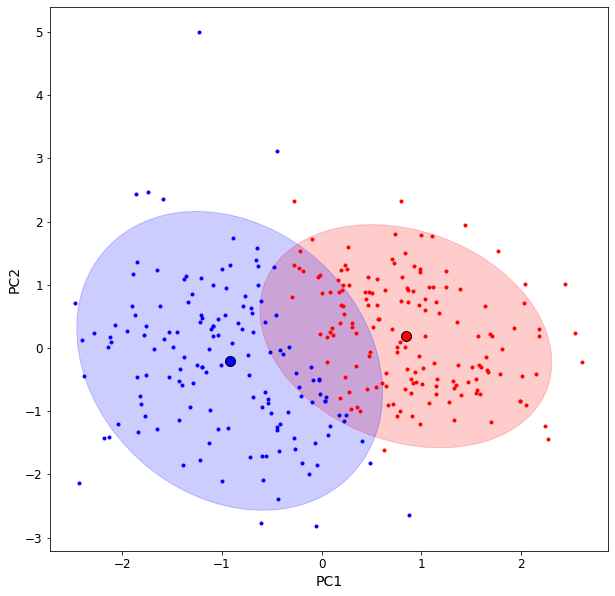

In [14]:
em=expectation_maximization(final_X_pca, NUM_CLUSTERS,MAX_ITERATIONS)


Weights:
 [0.54618013 0.45381987]

Means:
 [[ 0.79279515  0.25100905]
 [-0.95414277 -0.30209376]]

Type of covariance_GMM:
 <class 'numpy.ndarray'>
[0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0]

The best paramters are for SVM: 
 {'C': 0.1, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}

Fold:1, Train set: 202, Test set:101
Fold:2, Train set: 202, Test set:101
Fold:3, Train set: 202, Test set:101
Scores for each fold: [-0.0099

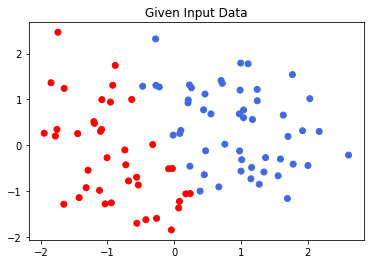


predicted values are :
 [1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1]



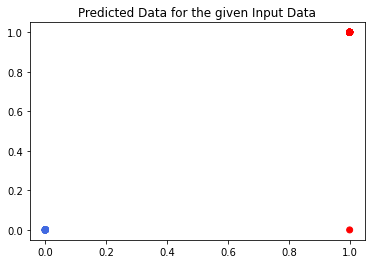


no.of predictions made are 
 (91,)

the predicted data to actual data for the given input data is shown below 

          PC1       PC2  actual  Predicted
113  0.174047 -1.062027       1          1
249  0.206597  0.922853       0          0
18   0.235203 -0.457943       0          0
142  1.783121 -0.413417       0          0
299  0.980101 -0.125349       0          0
270 -1.089254  0.343126       1          1
294 -0.042469 -1.849996       1          1
162  1.697552 -1.163375       0          0
13   1.039587  0.599596       0          0
24   2.613197 -0.216732       0          0

Confusion matrix for the model is shown below 

[[51  0]
 [ 1 39]]

Precision and Recall for the model are shown below 

1.0 0.5666666666666667

F1-score -  0.7234042553191489


In [15]:
from sklearn.mixture import GaussianMixture
import pandas as pdd
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut

seed=0

GMM = GMM1(n_components=2, covariance_type='tied',n_init=50,random_state=3)
res_GMM = GMM.fit(final_X_pca)

weights_GMM = GMM.weights_
print()
print("Weights:\n",weights_GMM)

means_GMM = GMM.means_
print()
print("Means:\n",means_GMM)

covariance_GMM = GMM.covariances_
print()
print("Type of covariance_GMM:\n",type(covariance_GMM))

covariance_GMM.size

y = res_GMM.predict(final_X_pca)
print(y)

#plt.scatter(final_X_pca['PC1'], final_X_pca['PC2'],c=vectorizer(y))

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(final_X_pca,y,test_size=0.3,random_state=4)

grd1 = GridSearchCV(estimator = SVC(),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                  }, cv=3,verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

print()
best_parameters = grid1.best_params_
print("The best paramters are for SVM: \n",best_parameters)

best_model1 = SVC(kernel='linear',C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=50, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

#scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

#scores = cross_validate(best_model1, final_X_pca, y, cv=3, scoring=scoring, return_train_score = True)

print()
#print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

kf =KFold(n_splits=3, shuffle=True, random_state=2)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

score = cross_val_score(best_model1, final_X_pca, y, cv= skf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

"""
kf=KFold(n_splits=3)
score=cross_val_score(best_model1,final_X_pca,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

stratifiedkf=StratifiedKFold(n_splits=3)
score=cross_val_score(best_model1,final_X_pca,y,cv=stratifiedkf)
print("Stratified KFold Cross Validation Scores are {}".format(score))
print("Stratified KFold Average Cross Validation score :{}".format(score.mean()))

loo=LeaveOneOut()
score=cross_val_score(best_model1,final_X_pca,y,cv=loo)
print("LeaveOneOut Cross Validation Scores are {}".format(score))
print("LeaveOneOut Average Cross Validation score :{}".format(score.mean()))
"""

y_pred_svm =best_model1.predict(x_test)
print("Accuracy is :",accuracy_score(y_test,y_pred_svm))

print()
print("given input is ,\n",x_test)
plt.scatter(x_test['PC1'], x_test['PC2'],c=vectorizer(y_test))
plt.title("Given Input Data")
plt.show()

print()
print("predicted values are :\n", y_pred_svm)
print()
plt.scatter(y_test, y_pred_svm,c=vectorizer(y_test))
plt.title("Predicted Data for the given Input Data")
plt.show()

predicted_data = pd.DataFrame().assign(PC1=x_test['PC1'], PC2=x_test['PC2'],actual=y_test,Predicted = y_pred_svm)

print()
print("no.of predictions made are \n",y_pred_svm.shape)
print()

print("the predicted data to actual data for the given input data is shown below \n")

print(predicted_data.head(10))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print()
print("Confusion matrix for the model is shown below \n")
print(cm_svm)

recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])

print()
print("Precision and Recall for the model are shown below \n")
print(recall_svm,precision_svm)

F1_svm = (2*precision_svm*recall_svm)/(precision_svm+recall_svm)

print()
print("F1-score - ",F1_svm)

In [16]:
print(x_test)

#y_prediction=best_model1.predict(x_test)
#print(y_prediction)

#Y=best_model1.predict(vectorizer(0.846979,0.510529))
#print(Y)

          PC1       PC2
113  0.174047 -1.062027
249  0.206597  0.922853
18   0.235203 -0.457943
142  1.783121 -0.413417
299  0.980101 -0.125349
..        ...       ...
93  -0.274228  1.305701
139 -1.655031 -1.288457
215 -1.846309  1.363400
281  0.078987 -1.227157
137 -0.322426  0.013561

[91 rows x 2 columns]


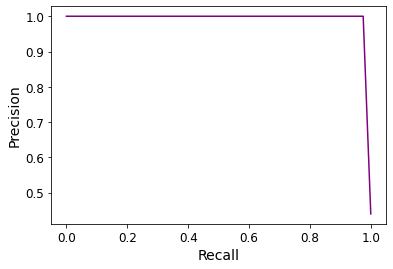

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svm)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)

#display plot
plt.savefig('P-R.eps')
plt.show()
files.download('P-R.eps')

In [18]:
#plotting SVM

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

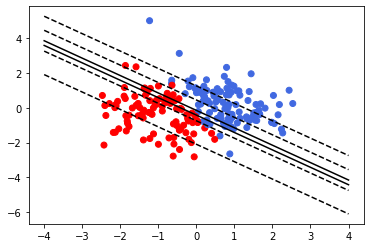

In [19]:
w=best_model1.coef_
b=best_model1.intercept_

def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[0]

plt.scatter(x_train['PC1'], x_train['PC2'],c=vectorizer(y_train))

# w.x + b = 0
a0 = -4; a1 = f(a0, w, b)
b0 = 4; b1 = f(b0, w, b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, w, b, 1)
b0 = 4; b1 = f(b0, w, b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, w, b, -1)
b0 = 4; b1 = f(b0, w, b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

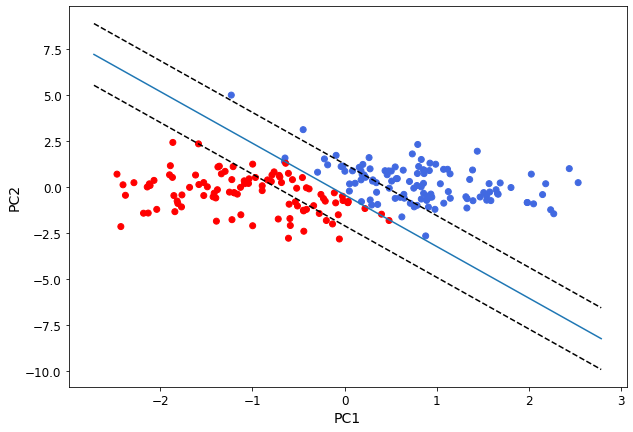

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(x_train['PC1'], x_train['PC2'], c=vectorizer(y_train));
ax = plt.gca()
xlim = ax.get_xlim()
w = best_model1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - best_model1.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('SVM_train.eps')
plt.show()
files.download('SVM_train.eps')

In [21]:
def plot_results1(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters):
    plt.figure(figsize=(10,10))
    plt.plot()
    for nc in range(len(means_clusters)):
        # Plot points in cluster
        points_cluster = list()
        for i, p in enumerate(label_cluster_points):
            if p == nc:
                plt.plot(points[i][0], points[i][1], linestyle='None',
                         color=COLORS[nc], marker='.')
                points_cluster.append(points[i])
        # Plot mean
        mean = means_clusters[nc]
        plt.plot(mean[0], mean[1], 'o', markerfacecolor=COLORS[nc],
                 markeredgecolor='k', markersize=10)

        # Plot Ellipse
        plot_ellipse(mean, covars_matrix_clusters[nc], 0.2, COLORS[nc])
        ax = plt.gca()
        xlim = ax.get_xlim()
        w = best_model1.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(xlim[0], xlim[1])
        yy = a * xx - best_model1.intercept_[0] / w[1]
        plt.plot(xx, yy)
        yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
        plt.plot(xx, yy, 'k--')
        yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
        plt.plot(xx, yy, 'k--')
        plt.xlabel('PC1', fontsize=14)
        plt.ylabel('PC2', fontsize=14)
        plt.xticks(size = 12)
        plt.yticks(size = 12)
    plt.savefig('EM-SVM.eps')
    plt.show()

def expectation_maximization1(dataset, num_clusters, max_iterations):
    # Read data set
    points = dataset.values

    # Object GMM
    gmm = GMM1(n_components=num_clusters, covariance_type='full',n_init=max_iterations)

    # Estimate Model (params='wmc'). Calculate, w=weights, m=mean, c=covars
    gmm.fit(points)

    # Predict Cluster of each point
    label_cluster_points = gmm.predict(points)

    means_clusters = gmm.means_
    probability_clusters = gmm.weights_
    covars_matrix_clusters = gmm.covariances_

    # Print final result
    print_results(means_clusters, probability_clusters,
                  label_cluster_points.tolist())

    # Plot Final results
    plot_results1(points, means_clusters, label_cluster_points,
                 covars_matrix_clusters)



FINAL RESULT:
	Cluster 1
		Number Points in Cluster 146
		Centroid: [-0.92207676 -0.2037378 ]
		Probability: 47.777143%
	Cluster 2
		Number Points in Cluster 157
		Centroid: [0.84358068 0.18639368]
		Probability: 52.222857%


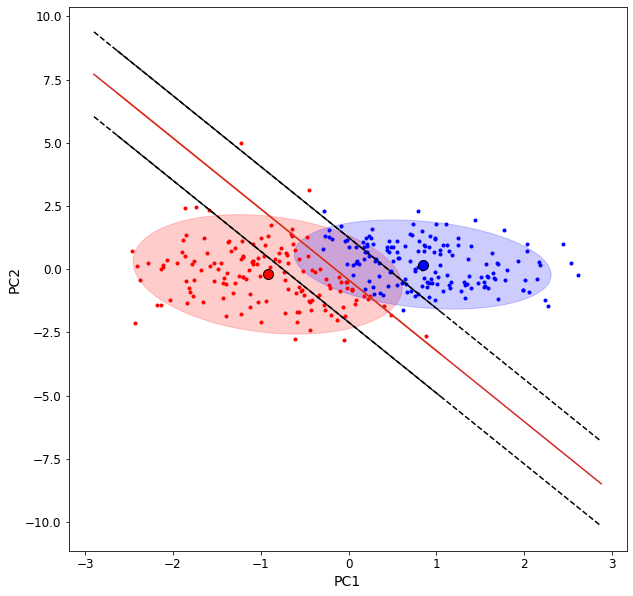

In [22]:
em=expectation_maximization1(final_X_pca, NUM_CLUSTERS,MAX_ITERATIONS)

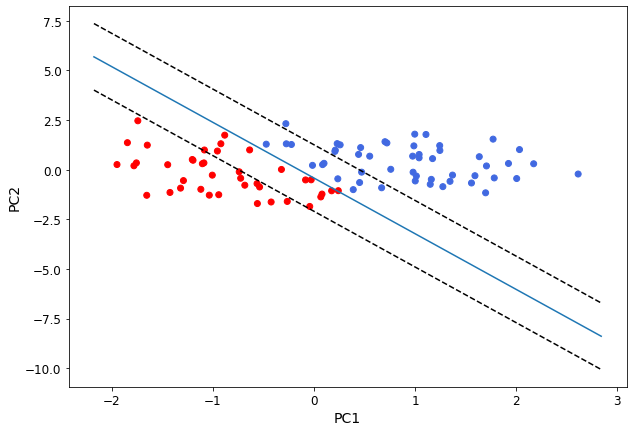

In [23]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(x_test['PC1'], x_test['PC2'], c=vectorizer(y_test));
ax = plt.gca()
xlim = ax.get_xlim()
w = best_model1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - best_model1.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (best_model1.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (best_model1.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('SVM_test.eps')
plt.show()
#files.download('SVM_test.eps')

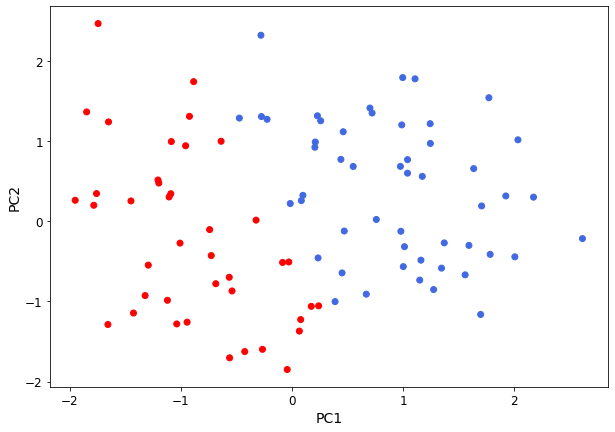

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(x_test['PC1'], x_test['PC2'], c=vectorizer(y_test));
ax = plt.gca()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.savefig('plot_SVM_test.eps')
plt.show()
files.download('plot_SVM_test.eps')

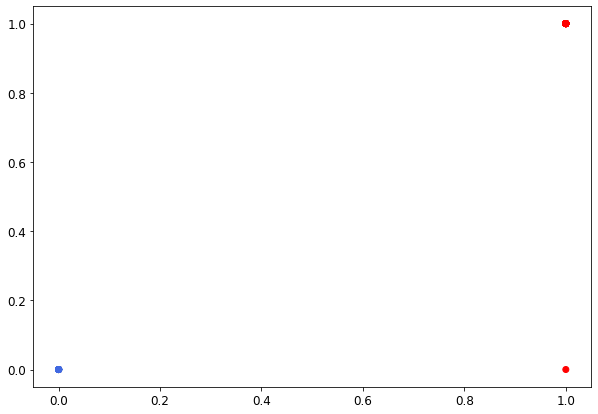

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(10,7), facecolor='w')
plt.scatter(y_test, y_pred_svm,c=vectorizer(y_test))
ax = plt.gca()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('plot_pred.eps')
plt.show()
files.download('plot_pred.eps')

In [26]:

#age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal
#features=[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
values=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

print("enter deatils separated by space :")
print("age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal")
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal = [int(i) for i in input("Enter deatils : ").split()]
features=[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]

res = dict(zip(values, features))

# Printing resultant dictionary 
print ("Details entered are : " +  str(res))

#data=dict('age'=age,'sex'=[sex],'cp'=[cp],'trestbps'=[trestbps],'chol'=[chol],'fbs'=[fbs],'restecg'=[restecg],'thalach'=[thalach],'exang'=[exang],'oldpeak'=[oldpeak],'slope'=[slope],'ca'=[ca],'thal'=[thal])
user_data = pd.DataFrame(columns=values)
user_data.loc[0] = features
print(user_data.head(10))

scaler.fit(user_data)
X_user_scaled_array = scaler.transform(user_data)
X_user_scaled = pd.DataFrame(X_user_scaled_array, columns = user_data.columns)

pca.fit(X_user_scaled)
X_user_pca_array = pca.transform(X_user_scaled)
X_user_pca = pd.DataFrame(X_user_pca_array, columns=['PC1','PC2']) 
X_user_pca.head(10)

best_model1.predict(X_user_pca)
"""
#
input_data_reshape = input_data.reshape(1, -1)

prediction = pipe.predict(input_data_reshape)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')
"""

enter deatils separated by space :
age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal


KeyboardInterrupt: ignored